In [1]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #For plotting
from sklearn.cluster import KMeans #Do K-Means clustering
from sklearn.metrics import silhouette_score #Calculate score of silhouette for each K
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator #Find the knee of the WCSS vs K plot
from yellowbrick.cluster import silhouette_visualizer #Plot Silhouette plot
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly
import plotly.express as px
import plotly.io as pio

In [5]:
#Importing the dataset
officeLat_data = pd.read_excel('Rental_Office_July_to_Nov_2018.xlsx')
officeLat_data.head()

,Unnamed: 0,month,code,office,rentals,returns,location_map,latitude,logitude
0,0,201806,101,101. (구)합정동 주민센터,832,807,"(37.549561, 126.905754)",37.549561,126.905754
1,1,201806,102,102. 망원역 1번출구 앞,2819,2568,"(37.5556488, 126.9106293)",37.555649,126.910629
2,2,201806,103,103. 망원역 2번출구 앞,1977,1769,"(37.55495071, 126.9108353)",37.554951,126.910835
3,3,201806,104,104. 합정역 1번출구 앞,1682,1610,"(37.55062866, 126.9149857)",37.550629,126.914986
4,4,201806,105,105. 합정역 5번출구 앞,1105,925,"(37.55000687, 126.9148254)",37.550007,126.914825


In [6]:
officeLat_data.drop(columns= ['month','office','code', 'location_map', 'Unnamed: 0'],inplace=True) #these columns are not useful in our groupings 
officeLat_data.head()

,rentals,returns,latitude,logitude
0,832,807,37.549561,126.905754
1,2819,2568,37.555649,126.910629
2,1977,1769,37.554951,126.910835
3,1682,1610,37.550629,126.914986
4,1105,925,37.550007,126.914825


In [7]:
officeLat_data.describe()

,rentals,returns,latitude,logitude
count,8038.000000,8038.000000,7837.000000,7837.000000
mean,864.065812,860.639836,37.542270,126.975355
std,725.979350,770.428084,0.427240,1.437148
min,0.000000,0.000000,0.000000,0.000000
25%,394.000000,362.000000,37.505463,126.918503
50%,693.000000,673.000000,37.545406,127.003281
75%,1127.000000,1140.000000,37.577686,127.059380
max,12207.000000,12332.000000,37.689720,127.180267


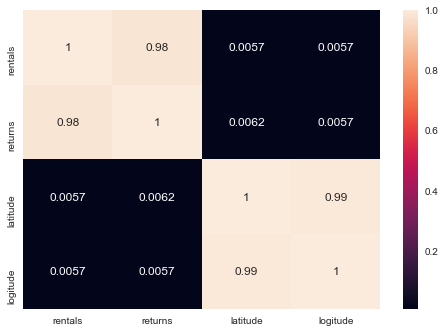

In [8]:
corrMatrix = officeLat_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

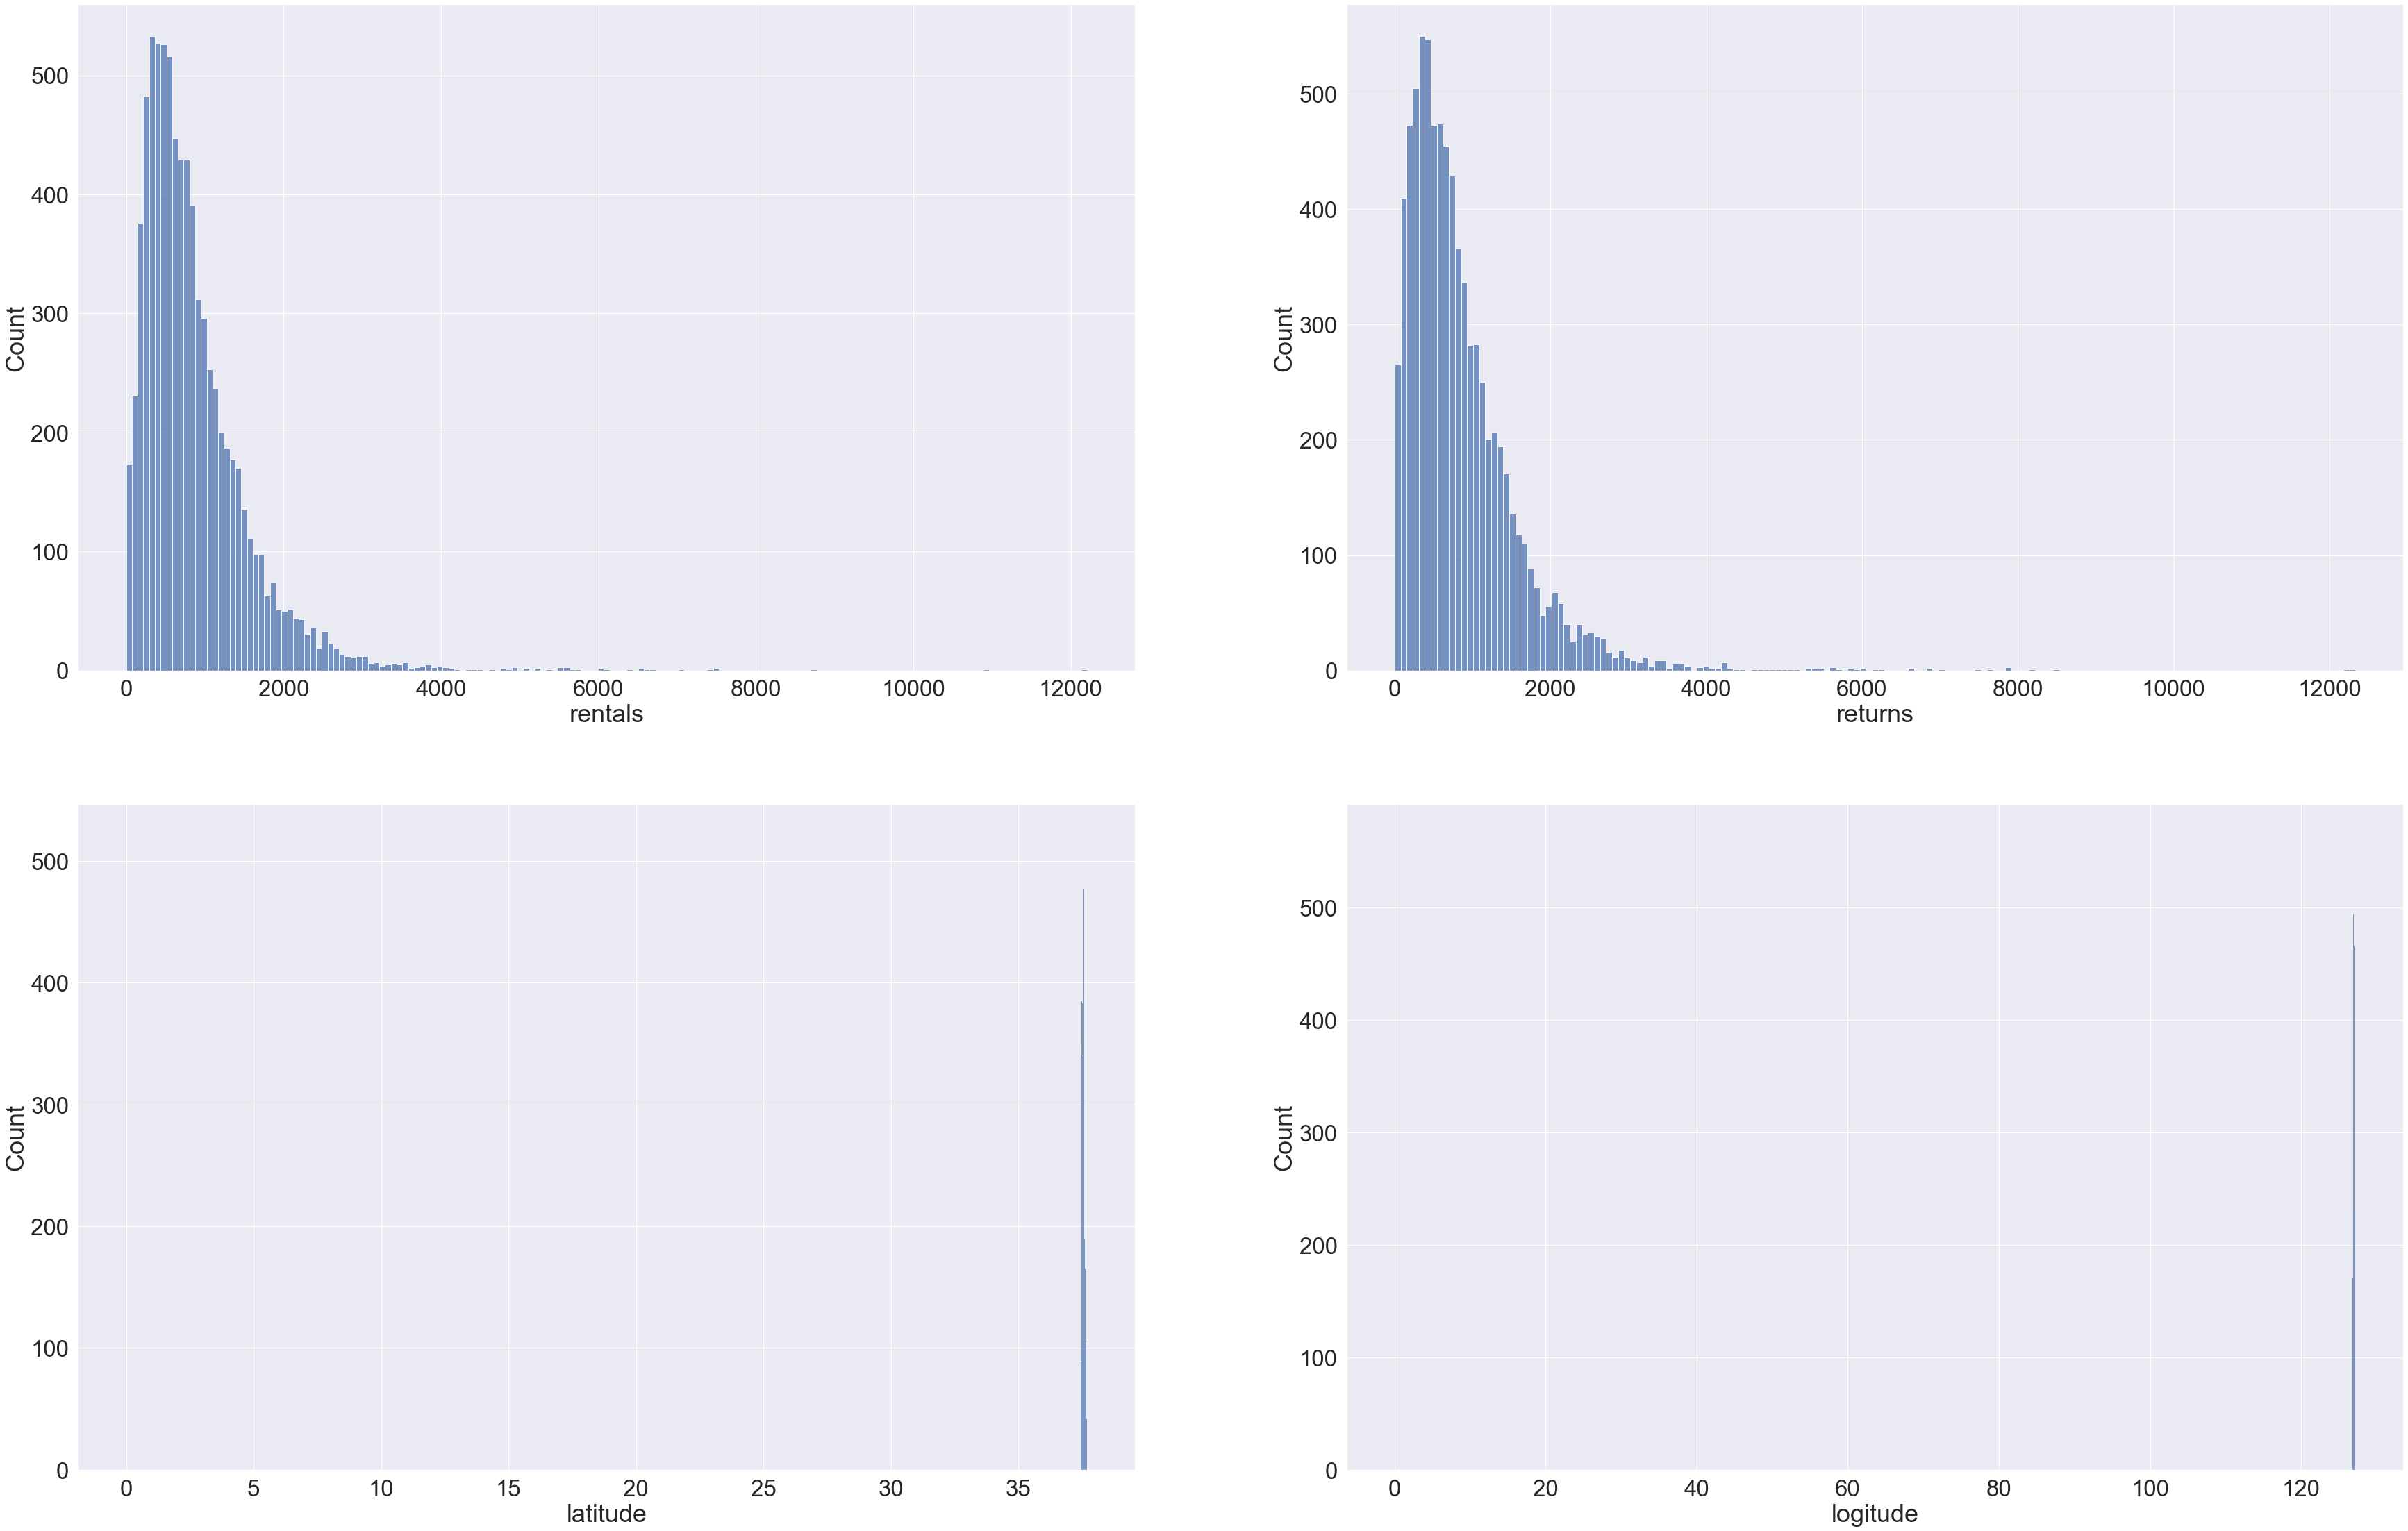

In [9]:
#Do a visual check to get a sense on how we can group some features
plt.figure(figsize=(60,60))
sns.set(font_scale = 3)
for i in range(len(officeLat_data.columns)):
    plt.subplot(3,2,i+1)
    freshplot = sns.histplot(officeLat_data.iloc[:,i])

In [11]:
#if the columns are too skewed, this is a method that scales each column of a dataframe, the output is a numpy array 
dataarray = officeLat_data.to_numpy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataarray) #Scaling inputs if required

### Elbow method with Total WCSS vs Number of Clusters

In [20]:
wcss = []
max_k = 14 # NOTE: Try 10 and 20
kmeans_kwargs = {"init" : "random",
                 "n_init" : 10,
                 "max_iter" : 300,
                 "random_state" : 42,}

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dataarray)
    wcss.append(kmeans.inertia_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
info = pd.read_excel('RentalOfficeData_Location_JanNov2018.xlsx')

In [15]:
info['location_map'].isna().sum()

421

In [17]:
officeLat_data['latitude'].isna().sum()

201

In [19]:
officeLat_data['logitude'].isna().sum()

201